# Task A

# A1

#### 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

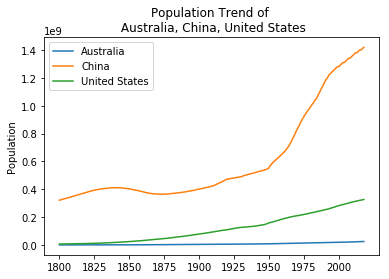

In [2]:
population_reports = pd.read_csv("Population.csv", index_col = 'Year') #Read data from .csv file
population_reports.index = population_reports.index.set_names(['']) #reset index name
population_ACU = pd.DataFrame(population_reports, columns=['Australia','China','United States']) #new df include 3 countries
population_ACU.plot.line() #build the graph
plt.title('Population Trend of \n Australia, China, United States')
plt.ylabel('Population')
plt.xticks(np.arange(1800, 2018, step=25))
plt.show()

#### 2

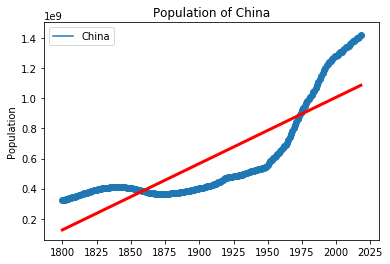

In [3]:
from scipy.stats import linregress
population_China = pd.DataFrame(population_reports, columns=['China']) #new df just with China
population_China.plot.line()
plt.title('Population of China')
plt.ylabel('Population')
plt.xticks(np.arange(1800, 2050, step=25))

slope, intercept, r_value, p_value, std_err = linregress(population_China.index,population_China['China']) # y = kx + b
line = [slope*xi + intercept for xi in population_China.index]
plt.plot(population_China.index,line,'r-', linewidth=3)
plt.scatter(population_China.index, population_China.China)
plt.show() 

In [4]:
x2020 = slope*2020+intercept
x2020

1095698498.7489567

In [5]:
x2100 = slope*2100+intercept
x2100

1448594862.1568203

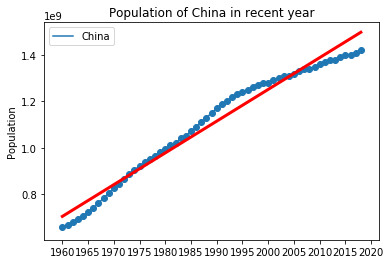

In [6]:
#predict from 1960
population_China_recent = population_China.loc[ 1960: , : ]
population_China_recent.plot.line()
plt.title('Population of China in recent year')
plt.ylabel('Population')
plt.xticks(np.arange(1960, 2050, step=5))

slope, intercept, r_value, p_value, std_err = linregress(population_China_recent.index,population_China_recent['China']) # y = kx + b
line = [slope*xi + intercept for xi in population_China_recent.index]
plt.plot(population_China_recent.index,line,'r-', linewidth=3)
plt.scatter(population_China_recent.index, population_China_recent.China)
plt.show() 

In [7]:
x2020 = slope*2020+intercept
x2020

1525489479.8363495

In [8]:
x2100 = slope*2100+intercept
x2100

2621339859.731148

# A2

#### 1

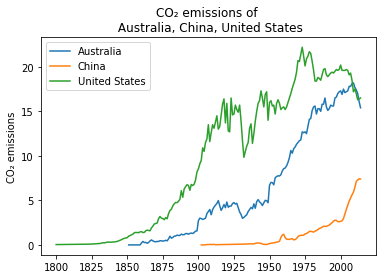

In [9]:
co2_reports = pd.read_csv("co2_emissions_tonnes_per_person.csv", index_col = 'country') #read data from .csv file
co2_reports.index = co2_reports.index.set_names(['']) #reset index name
co2_reports = co2_reports.transpose() #transpose index and columns
co2_reports.index = co2_reports.index.astype(int) #change data type of index
co2_ACU = pd.DataFrame(co2_reports, columns=['Australia','China','United States']) #take out 3 countries
co2_ACU.plot.line() #build picture
plt.title('CO₂ emissions of \n Australia, China, United States')
plt.ylabel('CO₂ emissions')
plt.xticks(np.arange(1800, 2018, step=25))
plt.show()

In [10]:
co2_ACU['Australia'].max()

18.2

In [11]:
co2_ACU['China'].max()

7.42

In [12]:
co2_ACU['United States'].max()

22.2

#### 2

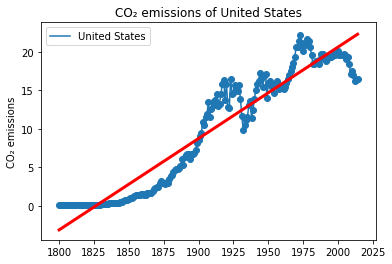

In [13]:
#fit linear regression of the CO₂ emissions of United States
co2_USA = pd.DataFrame(co2_ACU, columns=['United States'])
co2_USA.plot.line()
plt.title('CO₂ emissions of United States')
plt.ylabel('CO₂ emissions')
plt.xticks(np.arange(1800, 2050, step=25))

slope, intercept, r_value, p_value, std_err = linregress(co2_USA.index,co2_USA['United States']) # y = kx + b
line = [slope*xi + intercept for xi in co2_USA.index]
plt.plot(co2_USA.index,line,'r-', linewidth=3)
plt.scatter(co2_USA.index, co2_USA[['United States']])
plt.show()

# A3

#### 1

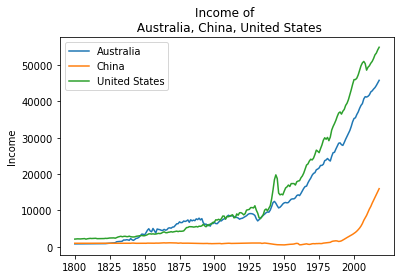

In [14]:
income_report = pd.read_csv("Income.csv", index_col = 'Year') #read data from .csv file 
income_report.index.names = [''] #rename index
income_report_ACU = income_report[['Australia','China','United States']] #new df with 3 countries
income_report_ACU.plot.line() #plot it
plt.title('Income of \n Australia, China, United States')
plt.ylabel('Income')
plt.xticks(np.arange(1800, 2018, step=25))
plt.show()

In [15]:
#find the minimum income of year in China and match the income of year in Australia
income_MinChina = income_report_ACU.loc[[income_report['China'].idxmin()],['Australia','China']]
income_MinChina

,Australia,China
,,
1949,11800,530


# A4

#### 1

In [16]:
#new df show the CO₂ emissions of all countries in every year
co2_bp = pd.read_csv("co2_emissions_tonnes_per_person.csv", index_col = 'country')
co2_bp.index = co2_bp.index.set_names([''])
co2_bp = co2_bp.transpose()
co2_bp.index = co2_bp.index.astype(int)
co2_bp.rename(columns = {'index':'Year'}, inplace = True)
co2_bp = pd.melt(co2_bp,  var_name='country', value_name='co2')
co2_bp.head()

,country,co2
0,Afghanistan,NaN
1,Afghanistan,NaN
2,Afghanistan,NaN
3,Afghanistan,NaN
4,Afghanistan,NaN


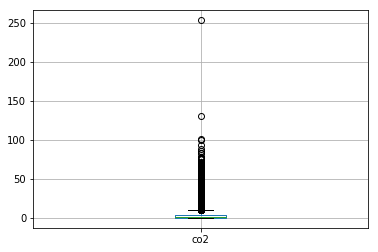

In [17]:
# creat boxplot to determine the valuable data
bp = co2_bp.boxplot(return_type='dict')
plt.show()

In [18]:
relation_column = np.asarray(sorted(list(set(population_reports.columns) | set(co2_reports.columns) | set(income_report.columns))))
relation_index = np.asarray(sorted(list(set(population_reports.index) | set(co2_reports.index) | set(income_report.index))))
relationship_report = pd.DataFrame(columns = pd.MultiIndex.from_product([relation_column,['population','co2','income']]),
                   index = relation_index) #creat new multiple level df with every countries and every year

#isnert data to cell with matching location
#for CO₂ emissions, we only leave the value under 100 as reasonable data
for i in relation_column:    
    for j in relation_index:
        
        if ((j in population_reports.index) & (i in population_reports.columns)):
            relationship_report.at[j, pd.IndexSlice[ i , 'population']] = population_reports.at[j,i]
        else:
            relationship_report.at[j, pd.IndexSlice[ i , 'population']] = np.nan
        
        if ((j in co2_reports.index) & (i in co2_reports.columns)):
            if co2_reports.at[j,i] < 100:
                relationship_report.at[j, pd.IndexSlice[ i , 'co2']] = co2_reports.at[j,i]
            else:
                relationship_report.at[j, pd.IndexSlice[ i , 'co2']] = np.nan
        else:
            relationship_report.at[j, pd.IndexSlice[ i , 'co2']] = np.nan
        
        
        if ((j in income_report.index) & (i in income_report.columns)):
            relationship_report.at[j, pd.IndexSlice[ i , 'income']] = income_report.at[j,i]
        else:
            relationship_report.at[j, pd.IndexSlice[ i , 'income']] = np.nan
            
relationship_report.tail()

Afghanistan                  Albania                 Algeria        \
      population    co2 income population   co2 income population   co2   
2014    32800000  0.299   1780    2920000  1.96  10700   39100000  3.72   
2015    33700000    NaN   1750    2920000   NaN  11000   39900000   NaN   
2016    34700000    NaN   1740    2930000   NaN  11400   40600000   NaN   
2017    35500000    NaN   1800    2930000   NaN  11900   41300000   NaN   
2018    36400000    NaN   1870    2930000   NaN  12400   42000000   NaN   

               Andorra  ...   Vietnam      Yemen                   Zambia  \
     income population  ...    income population    co2 income population   
2014  13500      79200  ...      5370   26200000  0.865   3770   15600000   
2015  13700      78000  ...      5670   26900000    NaN   2640   16100000   
2016  14000      77300  ...      5960   27600000    NaN   2330   16600000   
2017  13800      77000  ...      6250   28300000    NaN   2380   17100000   
2018  13700      77000  ...      6550   28900000    NaN   2430   17600000   

                     Zimbabwe               
        co2 income population   co2 income  
2014  0.288   3630   15400000  0.78   1910  
2015    NaN   3630   15800000   NaN   1890  
2016    NaN   3640   16200000   NaN   1860  
2017    NaN   3750   16500000   NaN   1910  
2018    NaN   3870   16900000   NaN   1950  

[5 rows x 585 columns]

#### 2

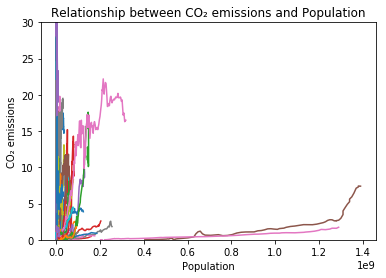

In [19]:
#show all of countries' CO₂ emissions vs population in focus 
plt.plot(relationship_report.loc[:,pd.IndexSlice['Afghanistan':'Zimbabwe', 'population']],relationship_report.loc[:,pd.IndexSlice['Afghanistan':'Zimbabwe', 'co2']])
plt.title('Relationship between CO₂ emissions and Population')
plt.ylabel('CO₂ emissions')
plt.xlabel('Population')
plt.ylim(0,30)
plt.show()


#### 3

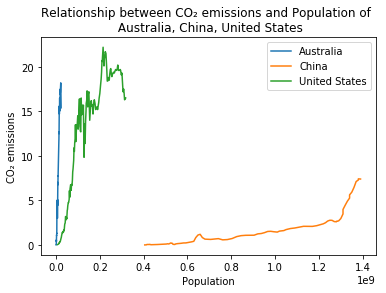

In [20]:
# show three countries CO₂ emissions vs population
df = relationship_report
plt.plot(df.loc[:,pd.IndexSlice['Australia', 'population']],df.loc[:,pd.IndexSlice['Australia', 'co2']], label = 'Australia')
plt.plot(df.loc[:,pd.IndexSlice['China', 'population']],df.loc[:,pd.IndexSlice['China', 'co2']], label = 'China' )
plt.plot(df.loc[:,pd.IndexSlice['United States','population']],df.loc[:,pd.IndexSlice['United States', 'co2']], label = 'United States' )

plt.title('Relationship between CO₂ emissions and Population of \n Australia, China, United States')
plt.ylabel('CO₂ emissions')
plt.xlabel('Population')
plt.legend()
plt.show()

# A5

#### 1

In [21]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [22]:
#create new readable and suitable df to motion chart
from motionchart.motionchart import MotionChart
populationData = pd.read_csv('Population.csv')
incomeData = pd.read_csv("Income.csv")

populationData = pd.melt(populationData, id_vars='Year', var_name='country', value_name='population')

co2_rep = pd.read_csv("co2_emissions_tonnes_per_person.csv", index_col = 'country')
co2_rep.index = co2_rep.index.set_names([''])
co2_rep = co2_rep.transpose()
co2_rep.index = co2_rep.index.astype(int)
co2_rep = co2_rep.reset_index()
co2_rep.rename(columns = {'index':'Year'}, inplace = True)
co2Data = pd.melt(co2_rep, id_vars='Year', var_name='country', value_name='co2')

incomeData = pd.melt(incomeData, id_vars='Year', var_name='country', value_name='income')

temp_df = pd.merge(populationData,co2Data, on=['Year','country'], how='outer')
final_df = pd.merge(temp_df, incomeData, on=['Year', 'country'], how='outer')
final_df.tail()

,Year,country,population,co2,income
42700,2014,Zimbabwe,15400000,0.78,1910.0
42701,2015,Zimbabwe,15800000,NaN,1890.0
42702,2016,Zimbabwe,16200000,NaN,1860.0
42703,2017,Zimbabwe,16500000,NaN,1910.0
42704,2018,Zimbabwe,16900000,NaN,1950.0


In [23]:
# #visualiza data on motion chart
finalmChart = MotionChart(df = final_df, key='Year', x='co2', y=['income'], xscale='linear', yscale='linear',
                     size='population', color='country', category='country')
finalmChart.to_notebook()

#### motion chart for Australia China and the United States

### NOTE!!! PLEASE REMOVE # BEOFORE START WITH CODE UDDER CELL

In [24]:
# filt = ((final_df['Year'] >= 1990) & (final_df['Year'] <= 2014)) & ((final_df['country'] == 'Australia') | (final_df['country'] == 'China') | (final_df['country'] == 'United States'))
# final_df_ACU = final_df[filt]
# finalmChart_ACU = MotionChart(df = final_df_ACU, key='Year', x='co2', y=['income'], xscale='linear', yscale='linear',
#                      size='population', color='country', category='country')
# finalmChart_ACU.to_notebook()

#### 2

In [25]:
#overview for every countries
des = co2_reports.describe()
des.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,66.000000,82.000000,105.000000,25.000000,65.000000,58.000000,128.000000,163.000000,164.000000,197.000000,...,215.000000,215.000000,83.000000,163.000000,53.000000,104.000000,114.000000,65.000000,51.000000,98.000000
mean,0.126237,1.241449,1.336551,6.889600,0.520222,4.600655,2.138937,0.701549,6.766415,3.588878,...,8.044372,9.586467,1.366399,2.639501,0.515245,4.559094,0.370977,0.662482,0.483941,1.022070
std,0.096251,0.805333,1.401746,0.688655,0.362969,3.112242,1.417567,0.718731,6.058693,2.825096,...,3.070226,7.754755,0.764284,2.603614,0.165330,3.017781,0.404010,0.308028,0.326034,0.492001
min,0.001910,0.007070,0.000000,5.830000,0.041100,0.409000,0.266000,0.000060,0.000000,0.051700,...,2.130000,0.037200,0.027500,0.000230,0.222000,0.000000,0.013100,0.009020,0.152000,0.058200
25%,0.049475,0.572250,0.016900,6.430000,0.201000,3.647500,0.915750,0.059550,1.255000,1.170000,...,5.430000,1.180000,1.125000,0.247000,0.433000,1.590000,0.098625,0.481000,0.202500,0.627500


In [26]:
#generally lowest co2 emissions
des.loc['mean',].idxmin()

'Burundi'

In [27]:
#generally highest co2 emissions
des.loc['mean',].idxmax()

'Qatar'